# Assignment 6.1

### Using section 5.1 in Deep Learning with Python as a guide (listing 5.3 in particular), create a ConvNet model that classifies images in the MNIST digit dataset. Save the model, predictions, metrics, and validation plots in the dsc650/assignments/assignment06/results directory. If you are using JupyterHub, you can include those plots in your Jupyter notebook.

In [1]:
from keras import layers
from keras import models

In [2]:
# instantiate a model
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))

# add a classifier on top of Convnet
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation = 'softmax'))

# view summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

In [3]:
from keras.datasets import mnist
from keras.utils import to_categorical
import numpy as np

In [4]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [5]:
# shuffle training set
for _ in range(5):
    indexes = np.random.permutation(len(train_images))
    
train_images = train_images[indexes]
train_labels = train_labels[indexes]

# put 10,000 aside for validation
val_images = train_images[:10000,:]
val_labels = train_labels[:10000,:]

# keep the rest in training set
train_images2 = train_images[10000:,:]
train_labels2 = train_labels[10000:,:]

# view their shape
train_images2.shape, val_images.shape

((50000, 28, 28, 1), (10000, 28, 28, 1))

In [6]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images2, train_labels2, epochs=5, batch_size=64,
                    validation_data = (val_images, val_labels))

Epoch 1/5
782/782 [==============================] - 12s 16ms/step - loss: 0.1913 - accuracy: 0.9408 - val_loss: 0.0492 - val_accuracy: 0.9839
Epoch 2/5
782/782 [==============================] - 12s 15ms/step - loss: 0.0518 - accuracy: 0.9844 - val_loss: 0.0485 - val_accuracy: 0.9854
Epoch 3/5
782/782 [==============================] - 11s 15ms/step - loss: 0.0370 - accuracy: 0.9887 - val_loss: 0.0306 - val_accuracy: 0.9898
Epoch 4/5
782/782 [==============================] - 11s 15ms/step - loss: 0.0255 - accuracy: 0.9917 - val_loss: 0.0429 - val_accuracy: 0.9873
Epoch 5/5
782/782 [==============================] - 11s 15ms/step - loss: 0.0209 - accuracy: 0.9938 - val_loss: 0.0279 - val_accuracy: 0.9916


In [7]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [8]:
import matplotlib.pyplot as plt

In [13]:
import os

In [14]:
os.getcwd()

'/home/jovyan/dsc650/dsc650'

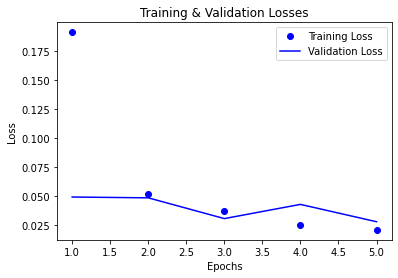

<Figure size 432x288 with 0 Axes>

In [15]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(history.history['loss']) + 1)

plt.plot(epochs, train_loss, 'bo', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training & Validation Losses')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.savefig('/home/jovyan/dsc650/dsc650/assignments/assignment06/results/6_1_Loss.png')

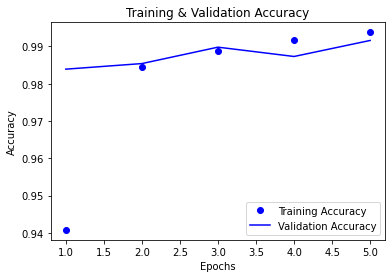

<Figure size 432x288 with 0 Axes>

In [16]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epcohs = range(1, len(history.history['accuracy']) + 1)

plt.plot(epochs, train_acc, 'bo', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
plt.savefig('/home/jovyan/dsc650/dsc650/assignments/assignment06/results/6_1_Accuracy')

In [17]:
# retrain model & evaluate for 3 epochs
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs = 3, batch_size = 64)
results = model.evaluate(test_images, test_labels)

Epoch 1/3
938/938 [==============================] - 12s 13ms/step - loss: 0.0207 - accuracy: 0.9936
Epoch 2/3
938/938 [==============================] - 12s 13ms/step - loss: 0.0157 - accuracy: 0.9953
Epoch 3/3
313/313 [==============================] - 1s 4ms/step - loss: 0.0342 - accuracy: 0.9912


In [18]:
results

[0.03418023884296417, 0.9911999702453613]

In [19]:
history.history

{'loss': [0.020670166239142418, 0.015682034194469452, 0.013516470789909363],
 'accuracy': [0.9936166405677795, 0.9952666759490967, 0.9959499835968018]}

In [20]:
model.save('/home/jovyan/dsc650/dsc650/assignments/assignment06/results/6_1_model.h5')

In [21]:
prediction_results = model.predict(test_images)

In [22]:
prediction_results

array([[4.7456681e-14, 2.6592741e-09, 8.4304147e-10, ..., 9.9999988e-01,
        7.0049376e-11, 1.5840668e-07],
       [4.5349310e-08, 1.5938194e-07, 9.9999988e-01, ..., 5.3458093e-12,
        8.0618217e-14, 4.3560163e-14],
       [8.9553337e-11, 9.9999797e-01, 1.6947376e-09, ..., 2.6520308e-07,
        7.3690137e-11, 2.4983045e-09],
       ...,
       [7.4172744e-21, 5.1019219e-12, 1.4456140e-15, ..., 1.7306298e-10,
        2.2197717e-13, 7.2898625e-11],
       [3.3632121e-11, 1.0755156e-14, 5.3416809e-16, ..., 4.8402844e-14,
        5.4988840e-09, 4.9146000e-12],
       [6.2092755e-11, 2.8341900e-14, 7.9025883e-11, ..., 2.1255905e-18,
        2.5833360e-11, 2.3249757e-12]], dtype=float32)

In [24]:
with open('/home/jovyan/dsc650/dsc650/assignments/assignment06/results/6_1_metrics.txt', 'w') as f:
    f.write('Training Loss: {}'.format(str(history.history['loss'])))
    f.write('\nTraining Accuracy: {}'.format(str(history.history['accuracy'])))
    f.write('\nTest Loss: {}'.format(results[0]))
    f.write('\nTest Accuracy: {}'.format(results[1]))

In [25]:
import pandas as pd

In [26]:
preds = pd.DataFrame(prediction_results,
                     columns = ['0','1','2','3','4','5','6','7','8','9'])

preds.to_csv('/home/jovyan/dsc650/dsc650/assignments/assignment06/results/6_1_predicitons.csv', index = False)

# Assignment 6.2a

### Using section 5.2 in Deep Learning with Python as a guide, create a ConvNet model that classifies images CIFAR10 small images classification dataset. Do not use dropout or data-augmentation in this part. Save the model, predictions, metrics, and validation plots in the dsc650/assignments/assignment06/results directory. If you are using JupyterHub, you can include those plots in your Jupyter notebook.

In [27]:
from keras.datasets import cifar10
from keras.utils import to_categorical
import pandas as pd

In [28]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 43s 0us/step


In [29]:
x_train.shape, y_train.shape

((50000, 32, 32, 3), (50000, 1))

In [30]:
x_test.shape, y_test.shape

((10000, 32, 32, 3), (10000, 1))

In [31]:
# preprocess data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# put 10,000 aside for validation
x_val = x_train[-10000:]
y_val = y_train[-10000:]
x_train = x_train[:-10000]
y_train = y_train[:-10000]

In [32]:
x_val.shape, y_val.shape

((10000, 32, 32, 3), (10000, 10))

In [33]:
from keras import models
from keras import layers

In [34]:
# instantiate the model
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation = 'softmax'))

# view summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 256)              

In [35]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=100,
                    validation_data = (x_val, y_val), verbose=0)

In [36]:
import matplotlib.pyplot as plt

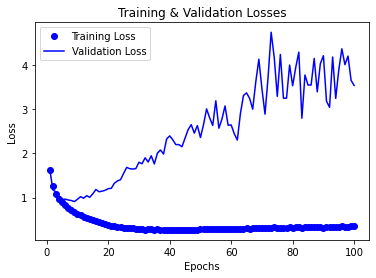

<Figure size 432x288 with 0 Axes>

In [37]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(history.history['loss']) + 1)

plt.plot(epochs, train_loss, 'bo', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training & Validation Losses')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.savefig('/home/jovyan/dsc650/dsc650/assignments/assignment06/results/6_2A_Loss.png')

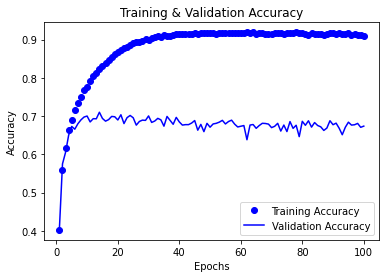

<Figure size 432x288 with 0 Axes>

In [38]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epcohs = range(1, len(history.history['accuracy']) + 1)
plt.plot(epochs, train_acc, 'bo', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
plt.savefig('/home/jovyan/dsc650/dsc650/assignments/assignment06/results/6_2A_Accuracy')

In [39]:
# retrain model & evaluate
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# preprocess data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10)
results = model.evaluate(x_test, y_test)

Epoch 1/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.9244 - accuracy: 0.7719
Epoch 2/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.8006 - accuracy: 0.7762
Epoch 3/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.7414 - accuracy: 0.7833
Epoch 4/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.7111 - accuracy: 0.7844
Epoch 5/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.6919 - accuracy: 0.7906
Epoch 6/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.6718 - accuracy: 0.7904
Epoch 7/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.6699 - accuracy: 0.7903
Epoch 8/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.6611 - accuracy: 0.7914
Epoch 9/10
1563/1563 [==============================] - 16s 11ms/step - loss: 0.6350 - accuracy: 0.7985
Epoch 10/10
313/313 [==============================] - 1s 4ms/st

In [40]:
model.save('/home/jovyan/dsc650/dsc650/assignments/assignment06/results/6_2A_model.h5')

In [41]:
prediction_results = model.predict(x_test)

In [42]:
prediction_results

array([[1.3920501e-01, 5.8909663e-08, 1.1701636e-02, ..., 4.1717396e-04,
        1.1220261e-02, 1.6795846e-05],
       [1.0745206e-16, 9.9999857e-01, 4.0205821e-26, ..., 1.7141741e-30,
        1.4746651e-06, 4.9971474e-13],
       [1.8164767e-01, 5.2700706e-02, 4.6945876e-03, ..., 5.8623154e-05,
        7.4497205e-01, 1.2249864e-02],
       ...,
       [2.8897497e-07, 1.7487033e-05, 1.4496895e-02, ..., 2.0005475e-01,
        1.8892171e-08, 2.0966316e-05],
       [1.6626522e-05, 4.6448240e-06, 4.1795922e-03, ..., 1.5234439e-05,
        4.6754668e-08, 3.6247652e-08],
       [0.0000000e+00, 0.0000000e+00, 1.9029255e-34, ..., 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [43]:
with open('/home/jovyan/dsc650/dsc650/assignments/assignment06/results/6_2A_metrics.txt', 'w') as f:
    f.write('Training Loss: {}'.format(str(history.history['loss'])))
    f.write('\nTraining Accuracy: {}'.format(str(history.history['accuracy'])))
    f.write('\nTest Loss: {}'.format(results[0]))
    f.write('\nTest Accuracy: {}'.format(results[1]))

In [44]:
preds = pd.DataFrame(prediction_results,
                     columns = ['0','1','2','3','4','5','6','7','8','9'])

preds.to_csv('/home/jovyan/dsc650/dsc650/assignments/assignment06/results/6_2A_predicitons.csv', index = False)

# Assignment 6.2b

### Using section 5.2 in Deep Learning with Python as a guide, create a ConvNet model that classifies images CIFAR10 small images classification dataset. This time includes dropout and data-augmentation. Save the model, predictions, metrics, and validation plots in the dsc650/assignments/assignment06/results directory. If you are using JupyterHub, you can include those plots in your Jupyter notebook.

In [45]:
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import matplotlib.pyplot as plt

In [46]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [47]:
x_train.shape, y_train.shape

((50000, 32, 32, 3), (50000, 1))

In [48]:
x_test.shape, y_test.shape

((10000, 32, 32, 3), (10000, 1))

In [49]:
# preprocess data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# put 10,000 aside for validation
x_val = x_train[-10000:]
y_val = y_train[-10000:]
x_train2 = x_train[:-10000]
y_train2 = y_train[:-10000]

In [50]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow(x_train2, y_train2, batch_size=32)

validation_generator = train_datagen.flow(x_val, y_val, batch_size=32)

In [51]:
from keras import models
from keras import layers

In [52]:
# instantiate the model
# add dropout layer
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation = 'softmax'))

# view summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 256)              

In [53]:
from keras import optimizers

In [54]:
model.compile(optimizer=optimizers.RMSprop(lr=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [55]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=len(x_train2) / 32,
                              epochs = 30,
                              validation_data=validation_generator,
                              validation_steps=len(x_val) / 32)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
1250/1250 [==============================] - 55s 44ms/step - loss: 2.1326 - accuracy: 0.2008 - val_loss: 1.9729 - val_accuracy: 0.2817
Epoch 2/30
1250/1250 [==============================] - 55s 44ms/step - loss: 1.9495 - accuracy: 0.2679 - val_loss: 1.8764 - val_accuracy: 0.3108
Epoch 3/30
1250/1250 [==============================] - 55s 44ms/step - loss: 1.8876 - accuracy: 0.2911 - val_loss: 1.8117 - val_accuracy: 0.3378
Epoch 4/30
1250/1250 [==============================] - 55s 44ms/step - loss: 1.8428 - accuracy: 0.3110 - val_loss: 1.7786 - val_accuracy: 0.3480
Epoch 5/30
1250/1250 [==============================] - 44s 35ms/step - loss: 1.8038 - accuracy: 0.3295 - val_loss: 1.7531 - val_accuracy: 0.3587
Epoch 6/30
1250/1250 [==============================] - 41s 33ms/step - loss: 1.7748 - accuracy: 0.3468 - val_loss: 1.7120 - val_accuracy: 0.3743
Epoch 7/30
1250/1250 [==========================

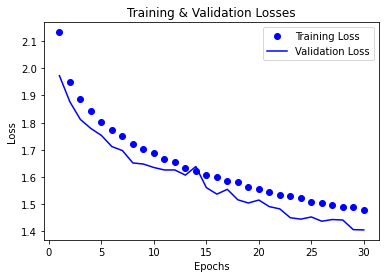

<Figure size 432x288 with 0 Axes>

In [56]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(history.history['loss']) + 1)

plt.plot(epochs, train_loss, 'bo', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training & Validation Losses')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.savefig('/home/jovyan/dsc650/dsc650/assignments/assignment06/results/6_2B_Loss.png')

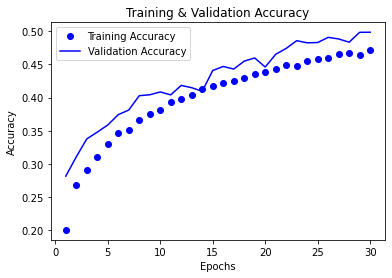

<Figure size 432x288 with 0 Axes>

In [57]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epcohs = range(1, len(history.history['accuracy']) + 1)

plt.plot(epochs, train_acc, 'bo', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
plt.savefig('/home/jovyan/dsc650/dsc650/assignments/assignment06/results/6_2B_Accuracy')

In [58]:
# retrain model & evaluate
train_generator = train_datagen.flow(x_train, y_train, batch_size=32)

model.compile(optimizer=optimizers.RMSprop(lr=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit_generator(train_generator,
                              steps_per_epoch=len(x_train) / 32,
                              epochs = 16)

results = model.evaluate(x_test, y_test)

Epoch 1/16
1563/1562 [==============================] - 43s 28ms/step - loss: 1.4701 - accuracy: 0.4726
Epoch 2/16
1563/1562 [==============================] - 43s 27ms/step - loss: 1.4612 - accuracy: 0.4755
Epoch 3/16
1563/1562 [==============================] - 43s 27ms/step - loss: 1.4560 - accuracy: 0.4782
Epoch 4/16
1563/1562 [==============================] - 43s 28ms/step - loss: 1.4530 - accuracy: 0.4812
Epoch 5/16
1563/1562 [==============================] - 43s 27ms/step - loss: 1.4449 - accuracy: 0.4824
Epoch 6/16
1563/1562 [==============================] - 43s 27ms/step - loss: 1.4340 - accuracy: 0.4865
Epoch 7/16
1563/1562 [==============================] - 43s 27ms/step - loss: 1.4267 - accuracy: 0.4859
Epoch 8/16
1563/1562 [==============================] - 43s 27ms/step - loss: 1.4250 - accuracy: 0.4919
Epoch 9/16
1563/1562 [==============================] - 43s 27ms/step - loss: 1.4182 - accuracy: 0.4939
Epoch 10/16
1563/1562 [==============================] - 43s 27m

In [59]:
model.save('/home/jovyan/dsc650/dsc650/assignments/assignment06/results/6_2B_model.h5')

In [60]:
prediction_results = model.predict(x_test)

In [61]:
prediction_results

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 2.1403628e-29,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [62]:
with open('/home/jovyan/dsc650/dsc650/assignments/assignment06/results/6_2B_metrics.txt', 'w') as f:
    f.write('Training Loss: {}'.format(str(history.history['loss'])))
    f.write('\nTraining Accuracy: {}'.format(str(history.history['accuracy'])))
    f.write('\nTest Loss: {}'.format(results[0]))
    f.write('\nTest Accuracy: {}'.format(results[1]))

In [63]:
preds = pd.DataFrame(prediction_results,
                     columns = ['0','1','2','3','4','5','6','7','8','9'])

preds.to_csv('/home/jovyan/dsc650/dsc650/assignments/assignment06/results/6_2B_predicitons.csv', index = False)